In [3]:
from dtw import dtw, accelerated_dtw

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
test = pd.read_csv('./data/buy_week.csv', index_col=0)

In [28]:
weather = test.columns[-9:].to_list()

In [33]:
products = test.columns[:-9].to_list()

평균구름양


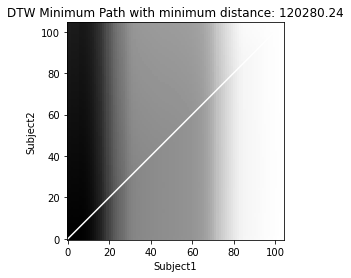

평균습도


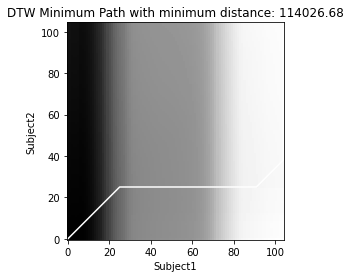

일강수량


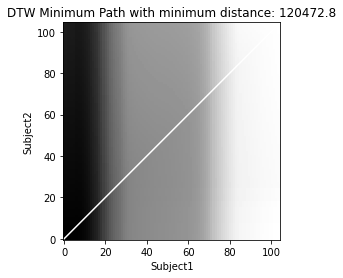

평균기온


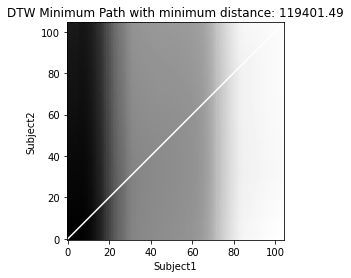

일교차


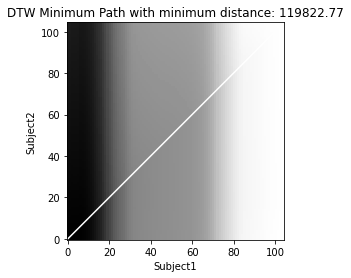

평균풍속


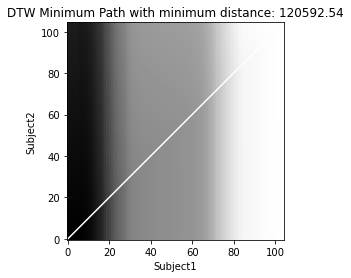

증발량


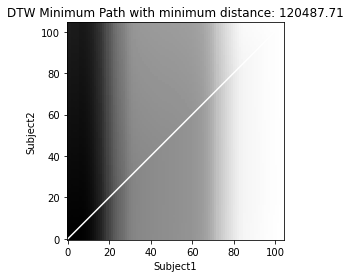

미세먼지


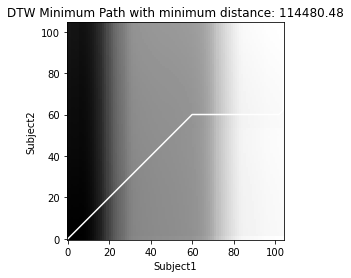

일사량


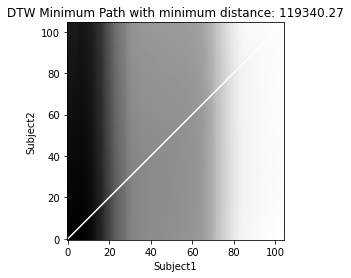

In [32]:
for k in weather: 
    print(k)
    df = test[['선케어용 선밤', k]]
    d1 = df['선케어용 선밤'].interpolate().values
    d2 = df[k].interpolate().values
    d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1, d2, dist='euclidean')
    plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    plt.plot(path[0], path[1], 'w')
    plt.xlabel('Subject1')
    plt.ylabel('Subject2')
    plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
    plt.show()

In [44]:
a = test[['색조 메이크업 세트']]
a1 = a['색조 메이크업 세트'].interpolate().values

In [47]:
np.sum(a1)

83.0

In [50]:
weather

['평균구름양', '평균습도', '일강수량', '평균기온', '일교차', '평균풍속', '증발량', '미세먼지', '일사량']

In [49]:
for j in products:
    path_list = []
    for k in weather: 
        df = test[[j, k]]
        d1 = df[j].interpolate().values
        d2 = df[k].interpolate().values
        d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1, d2, dist='euclidean')
        path_list.append(d)
#         plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
#         plt.plot(path[0], path[1], 'w')
#         plt.xlabel('Subject1')
#         plt.ylabel('Subject2')
#         plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
#         plt.show()
    temp = min(path_list)
    if temp < 500 and np.sum(d1) > 1000:
        idx = path_list.index(temp)
        print(j)
        print(weather[idx], temp)
        print('2년 총 판매 개수', np.sum(d1))
        print('\n\n')

선파우더
평균기온 422.9429351186924
2년 총 판매 개수 1165.0



헤어무스
일교차 267.9424420762876
2년 총 판매 개수 1179.0





In [21]:
d1 = df['히터'].interpolate().values
d2 = df['평균기온'].interpolate().values

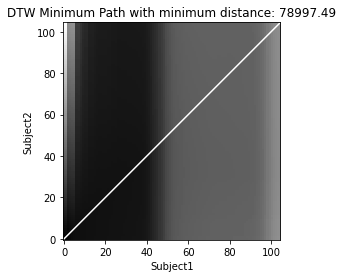

In [22]:
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

In [23]:
d

78997.48700482163